In [146]:
import sys
sys.path.append("..")

import Essentials

In [147]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [148]:
data_archive = np.load('../Data_First.npz', allow_pickle=True)

In [149]:
def prepare_Y(y):
    timestamp = y[:, 1]   
    y = y[:, 0].reshape(len(y), 1)
    y = y.astype(np.float64)

    return y, timestamp

In [150]:
all_X_1 = data_archive['all_X_1']
all_Y_1 = data_archive['all_Y_1']

all_X_2 = data_archive['all_X_2']
all_Y_2 = data_archive['all_Y_2']

all_X_3 = data_archive['all_X_3']
all_Y_3 = data_archive['all_Y_3']

x_summer_half_2 = data_archive['x_summer_half_2']
y_summer_half_2 = data_archive['y_summer_half_2']
x_winter_half_2 = data_archive['x_winter_half_2']
y_winter_half_2 = data_archive['y_winter_half_2']

x_summer_half_3 = data_archive['x_summer_half_3']
y_summer_half_3 = data_archive['y_summer_half_3']
x_winter_half_3 = data_archive['x_winter_half_3']
y_winter_half_3 = data_archive['y_winter_half_3']

In [151]:
x_train, x_test, y_train, y_test = train_test_split(all_X_3, all_Y_3, test_size=0.3, random_state=42)

In [152]:
y_train, timestamp_train = prepare_Y(y_train)

In [153]:
y_test, timestamp_test = prepare_Y(y_test)

In [154]:
x_train_summer, x_test_summer, y_train_summer, y_test_summer = train_test_split(x_summer_half_2, y_summer_half_2, test_size=0.2, random_state=42)

In [155]:
x_train_winter, x_test_winter, y_train_winter, y_test_winter = train_test_split(x_winter_half_2, y_winter_half_2, test_size=0.2, random_state=42)

In [156]:
y_train_summer, timestamp_train_summer = prepare_Y(y_train_summer)

In [157]:
y_train_winter, timestamp_train_winter = prepare_Y(y_train_winter)

In [158]:
y_test_summer, timestamp_test_summer = prepare_Y(y_test_summer)

In [159]:
y_test_winter, timestamp_test_winter = prepare_Y(y_test_winter)

In [160]:
x_train.shape

(158, 81)

In [161]:
class LR(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train):
        super().__init__(name)
        self.model = LinearRegression()
        self.train(x_train, y_train)
        self.set_model(self.model)

    def preprocessing(self, x):
        return x
    
    def postprocessing(self, x):
        return x

    def evaluate_model(self, x):
        predictions = self.get_model().predict(x)
        return predictions

    def train(self, x_train, y_train):
        self.model.fit(x_train,y_train)

    def __str__(self):
        return  f"Коэффициенты линейной регрссии = {self.get_model().coef_.reshape(-1,1)}, Свободный член = {self.get_model().intercept_.reshape(-1, 1)}"

In [162]:
LR_test = LR("LR", x_train, y_train)

In [163]:
metric = Essentials.R2Metric()

In [164]:
print(LR_test)

Коэффициенты линейной регрссии = [[ 1.17671833e-01]
 [ 7.76747549e-03]
 [ 5.50117916e-02]
 [-2.04269998e-01]
 [ 2.62372390e-01]
 [ 7.50256617e+00]
 [-3.49949952e-02]
 [ 6.13938030e-01]
 [-3.00193778e+01]
 [-2.34547486e-02]
 [ 5.93502203e+01]
 [-9.88778928e-01]
 [ 2.19618924e+00]
 [-3.98665737e+00]
 [ 4.43066830e+01]
 [-1.56534610e+01]
 [ 4.45905971e-01]
 [ 2.75943580e+01]
 [-1.93060818e+00]
 [ 5.89357545e+00]
 [-1.41891776e-01]
 [-1.60122535e-01]
 [ 3.95466491e-01]
 [ 6.59350689e-01]
 [-1.30711883e+00]
 [ 1.08711027e-01]
 [ 8.29397397e-01]
 [ 2.80079844e+00]
 [ 1.68330622e-01]
 [ 2.58268435e-01]
 [ 9.67860331e-02]
 [ 2.21544567e-03]
 [-1.48483406e-01]
 [-1.18753580e-01]
 [-4.82426873e-01]
 [ 3.16314115e+01]
 [-5.13259379e+01]
 [-5.44428566e+00]
 [ 2.19672600e+01]
 [ 1.77590944e+00]
 [-2.88284906e+01]
 [-2.25990017e+00]
 [ 2.56073372e+01]
 [ 9.51478283e-01]
 [-1.76748273e-01]
 [ 1.79160389e-01]
 [-1.02007608e+02]
 [ 5.35916136e+00]
 [-4.34020746e-04]
 [-7.01213938e-02]
 [-3.19004978e-02

In [165]:
LR_test.test(x_test, y_test, metric)

(array([[22.7767227 ],
        [25.93900583],
        [30.86019647],
        [21.34564547],
        [23.90838428],
        [24.96801863],
        [25.1308703 ],
        [28.00715237],
        [28.06606542],
        [29.17662881],
        [34.41036816],
        [25.40976863],
        [27.80098403],
        [44.07589101],
        [28.50796361],
        [28.54000869],
        [31.0433602 ],
        [29.09488744],
        [25.67507773],
        [27.47872943],
        [30.69993125],
        [25.34028814],
        [27.02755034],
        [26.09285292],
        [28.75841432],
        [30.26262982],
        [26.52867074],
        [24.33197092],
        [26.03386069],
        [28.74146341],
        [28.82294166],
        [31.4013066 ],
        [27.02229176],
        [23.7814487 ],
        [28.44379813],
        [28.86949484],
        [26.14340146],
        [30.77362352],
        [28.07432608],
        [29.75388659],
        [26.23867546],
        [25.58961116],
        [26.31074756],
        [25

In [166]:
LR_test_visual_train = Essentials.Visualizer(x_train, y_train, timestamp_train, [metric], 'LR SoftSensor R2 metric on Train')

    Coefficient of determination
LR                       0.87256


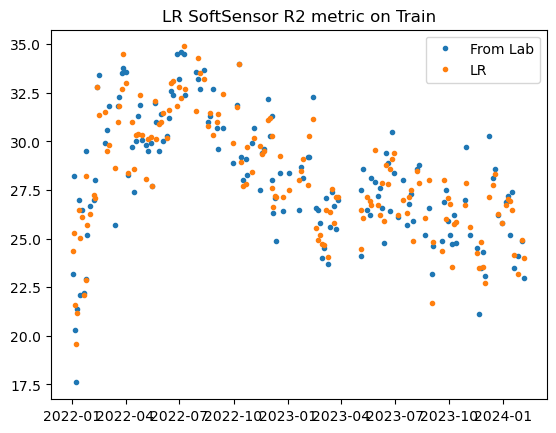

In [167]:
LR_test_visual_train.visualize([LR_test])

In [168]:
LR_test_visual_test = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'LR SoftSensor R2 metric on Test')

    Coefficient of determination
LR                     -0.741005


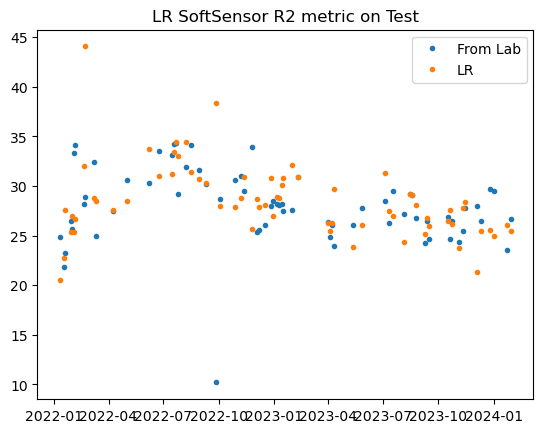

In [169]:
LR_test_visual_test.visualize([LR_test])